In [ ]:
import pandas as pd, sqlite3
from pandas.plotting import scatter_matrix

# Ex06. Матрица рассеяния

## 1. Подключение к базе данных

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## 2. Матрица рассеяния средней разницы, количества просмотров страницы и количества коммитов

In [ ]:
test = pd.read_sql('''
            SELECT t.uid,
                    AVG((strftime('%s', t.first_commit_ts) - d.deadlines) / 3600) avg_diff,
                    COUNT(DISTINCT(p.datetime)) pageviews,
                    COUNT(DISTINCT(c.timestamp)) num_commits
            FROM test t
            LEFT JOIN deadlines d ON t.labname = d.labs AND t.labname != 'project1'
            LEFT JOIN pageviews p ON p.uid = t.uid
            LEFT JOIN checker c ON c.uid = t.uid AND c.labname != 'project1'
            GROUP BY t.uid
            ''', conn)

In [61]:
test

,uid,avg_diff,pageviews,num_commits
0,user_1,-64.400000,28,62
1,user_10,-74.800000,89,20
2,user_14,-159.000000,143,61
3,user_17,-61.600000,47,51
4,user_18,-5.666667,3,5
5,user_19,-98.750000,16,118
6,user_21,-95.500000,10,65
7,user_25,-92.600000,179,79
8,user_28,-86.400000,149,60
9,user_3,-105.400000,317,18


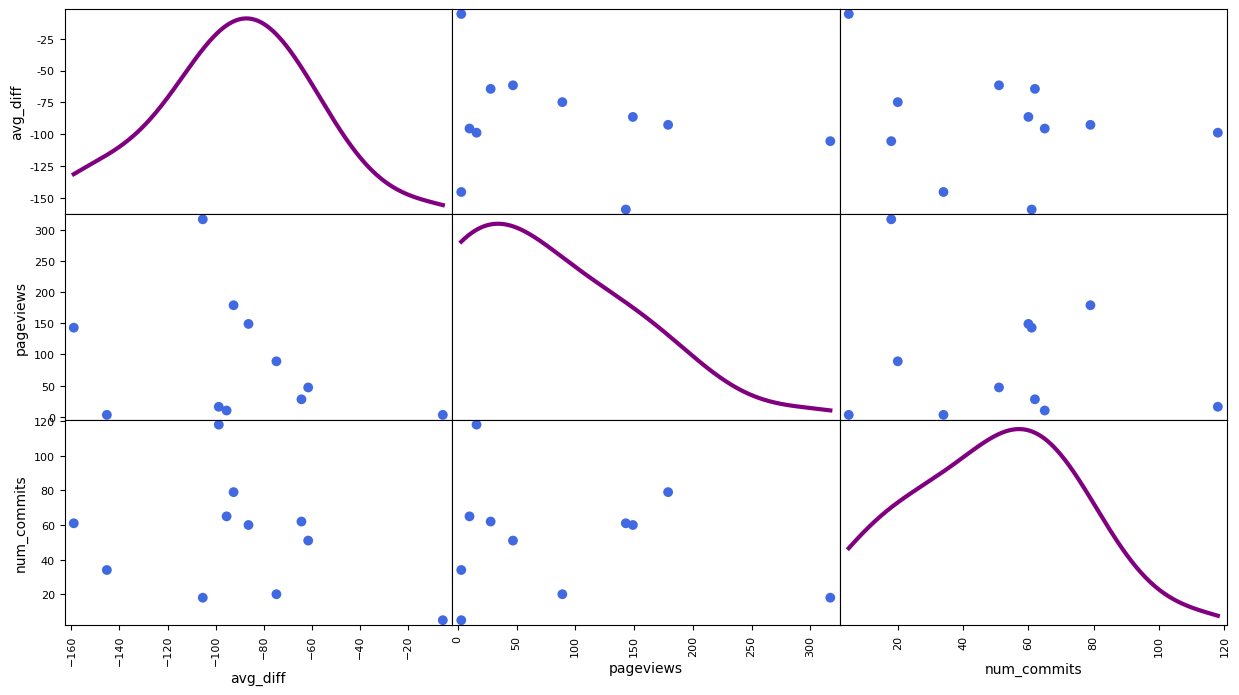

In [59]:
axes = scatter_matrix(test, figsize=(15, 8), diagonal='kde', color='royalblue', alpha=1, marker='.', s=200)
for i in range(3):
    for line in axes[i, i].get_lines():
        line.set_linewidth(3)
        line.set_color('purple')

**Можно ли сказать, что если у пользователя мало просмотров страниц, то, вероятно, у него мало и коммитов?**\
Ответ: *нет*

**Можно ли сказать, что если у пользователя мало просмотров страниц, то, скорее всего, разница между первым коммитом и дедлайном лабораторной работы будет небольшой?**\
Ответ: *нет*

**Можно ли сказать, что существует множество пользователей с малым количеством коммитов и несколько пользователей с большим количеством коммитов?**\
Ответ: *да*

**Можно ли сказать, что существует множество пользователей с небольшой средней разницей и несколько пользователей с большой средней разницей?**\
Ответ: *нет*

## 3. Закрытие соединения

In [ ]:
conn.close()